In [3]:
import pandas as pd

df = pd.read_csv('flavors_of_cacao.csv')
  # Adjust path as needed
df.head()


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [1]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


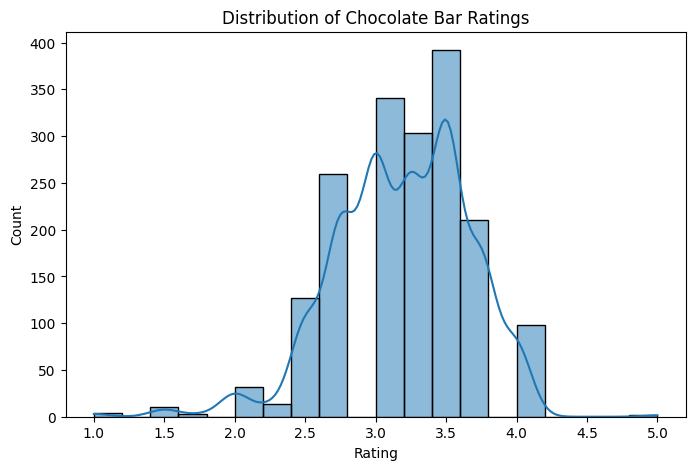

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Chocolate Bar Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

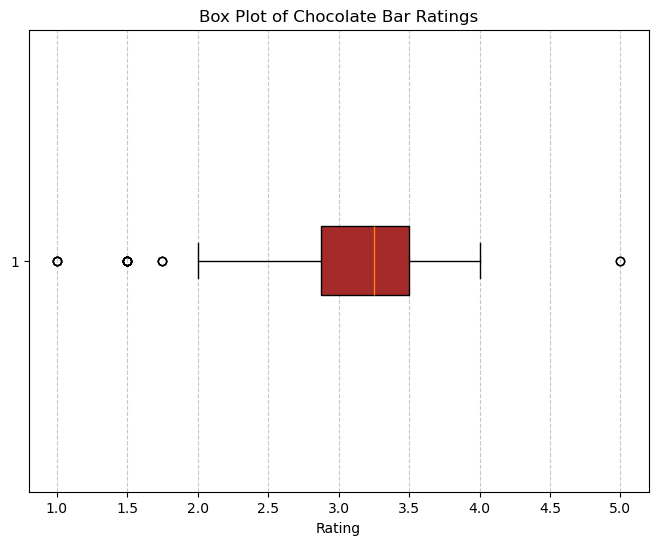

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Rating'], vert=False, patch_artist=True, boxprops=dict(facecolor='brown', color='black'))
plt.title('Box Plot of Chocolate Bar Ratings')
plt.xlabel('Rating')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

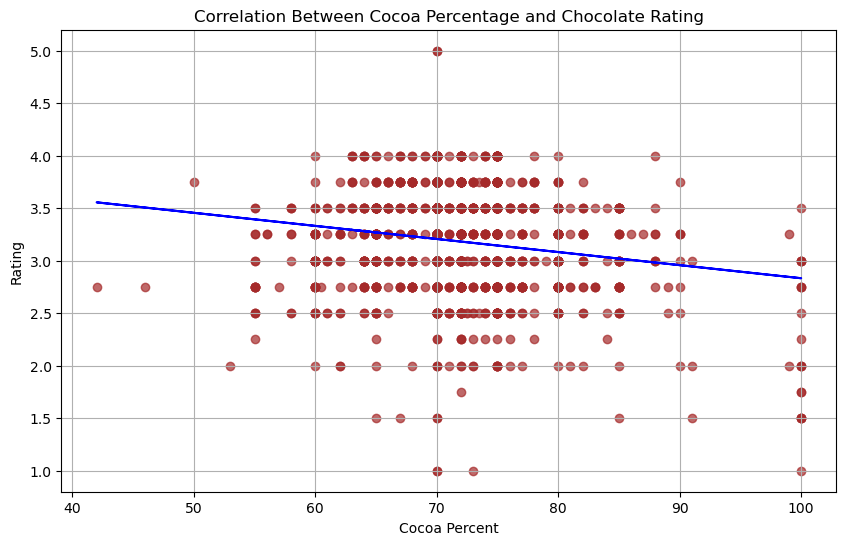

In [ ]:
import numpy as np

# Clean column names to remove unwanted characters or spaces
df.columns = df.columns.str.replace('\n', ' ').str.strip()

plt.figure(figsize=(10, 6))
plt.scatter(df["Cocoa Percent"], df['Rating'], alpha=0.7, color='brown')

# Calculate the trend line
x = df['Cocoa Percent']
y = df['Rating']
m, b = np.polyfit(x, y, 1)  # Linear regression (degree=1)
plt.plot(x, m * x + b, color='blue', label=f'Trend Line (y={m:.2f}x+{b:.2f})')


plt.title('Correlation Between Cocoa Percentage and Chocolate Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.grid(True)
plt.show()